2


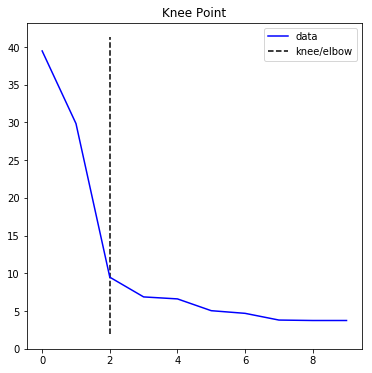

In [11]:
#Works Only with Python 3

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from kneed import KneeLocator
y = [39.48572377,29.85299989 , 9.48860291 , 6.87495423 , 6.61210015 , 5.04854712 ,4.69691816,  3.80722248,  3.74839207 , 3.74839207]
kn = KneeLocator(range(len(y)), y, S=1.0, curve='convex', direction='decreasing')
print(kn.knee)

kn.plot_knee()

228 3.433296260307025


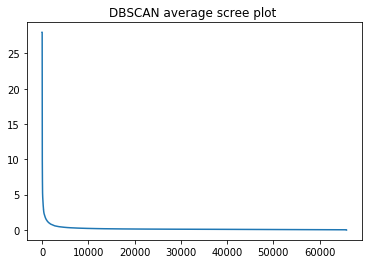

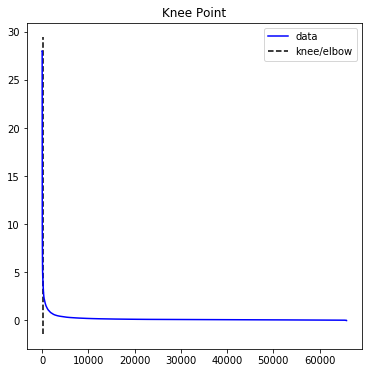

In [14]:
import pickle
import numpy as np

k = 4
clf_result = {}
fold = 1    
method ='DBSCAN'

for i in range(k):
    with open('../../data/pkl/'+str(method)+'_scree_fold_'+str(fold)+'.pickle', 'rb',) as handle:
        distances, indices =pickle.load(handle,encoding='bytes')
    #print(len(distances),len(indices))
    
    for j in range(len(indices)):
        if clf_result.get(j,None) is None:
            clf_result[j] = 0.
        else:
            clf_result[j] += distances[j]

    fold += 1


for i in range(len(indices)):
    clf_result[i] =float(clf_result[i]) / 4.
dstances = clf_result.values()
dstances = np.sort(distances, axis=0)[::-1]

plt.figure(fold)
plt.plot(range(len(dstances)), dstances)
plt.title(str(method)+' average scree plot ')

kn = KneeLocator(range(len(dstances)), dstances, S=1.0, curve='convex', direction='decreasing')
print(kn.knee, dstances[kn.knee])
kn.plot_knee()